In [ ]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image as keras_image
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score, roc_curve





In [ ]:
!rm -rf /content/drive/*
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Unzip dataset
# zip_file_path = '/content/drive/MyDrive/Dataset_Large/Dataset.zip'
# extract_to_directory = '/content/drive/MyDrive/Pancreas/Images'
# os.makedirs(extract_to_directory, exist_ok=True)

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_directory)

# print("Extraction complete.")



KeyboardInterrupt: 

In [ ]:
# Load and preprocess images
def load_and_preprocess_images(folder, target_size=(224, 224), limit=None):
    images = []
    for i, filename in enumerate(os.listdir(folder)):
        if limit and i >= limit:
            break
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            images.append(img_resized)
    return images



In [ ]:
# Paths to image directories
X_train_dir = '/content/drive/MyDrive/Pancreas/Images/X_train'
Y_train_dir = '/content/drive/MyDrive/Pancreas/Images/Y_train'
X_test_dir = '/content/drive/MyDrive/Pancreas/Images/X_test'
Y_test_dir = '/content/drive/MyDrive/Pancreas/Images/Y_test'



In [ ]:
# Load and preprocess smaller-sized images directly
X_train_resized = load_and_preprocess_images(X_train_dir, target_size=(128, 128), limit=5000)
Y_train_resized = load_and_preprocess_images(Y_train_dir, target_size=(128, 128), limit=5000)
X_test_resized = load_and_preprocess_images(X_test_dir, target_size=(128, 128), limit=2000)
Y_test_resized = load_and_preprocess_images(Y_test_dir, target_size=(128, 128), limit=2000)



In [ ]:
# Convert lists to numpy arrays
X_train_resized = np.array(X_train_resized)
Y_train_resized = np.array(Y_train_resized)
X_test_resized = np.array(X_test_resized)
Y_test_resized = np.array(Y_test_resized)



X_train_resized shape: (5000, 128, 128, 3)
Y_train_resized shape: (5000, 128, 128, 3)
X_test_resized shape: (2000, 128, 128, 3)
Y_test_resized shape: (2000, 128, 128, 3)


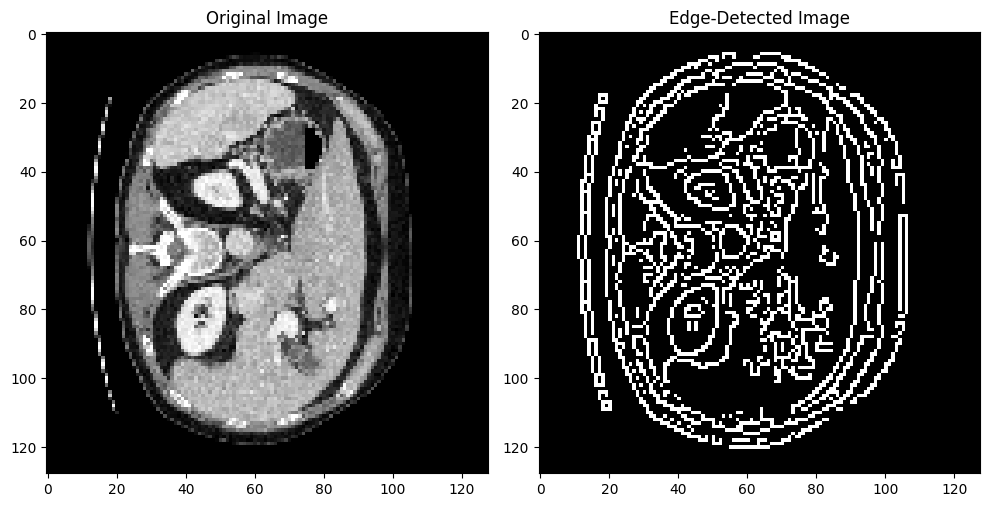

In [ ]:
# Print shapes
print('X_train_resized shape:', X_train_resized.shape)
print('Y_train_resized shape:', Y_train_resized.shape)
print('X_test_resized shape:', X_test_resized.shape)
print('Y_test_resized shape:', Y_test_resized.shape)

# Display edge detection for a sample image
sample_image = X_train_resized[0]
edges = cv2.Canny(sample_image, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image')
plt.tight_layout()
plt.show()



In [ ]:
# Convert labels to binary format
def convert_to_binary(labels):
    binary_labels = np.zeros((labels.shape[0], 1))
    for i in range(labels.shape[0]):
        if np.any(labels[i] > 0):  # Check if any value in the label array is above zero
            binary_labels[i] = 1    # Set as class 1 (cancerous feature) if any value is above zero
    return binary_labels

Y_train_binary = convert_to_binary(Y_train_resized)
Y_test_binary = convert_to_binary(Y_test_resized)



In [ ]:
# Define and compile CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resized, Y_train_binary, epochs=10, batch_size=32, validation_data=(X_test_resized, Y_test_binary))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.6573 - loss: 71.7111 - val_accuracy: 0.7700 - val_loss: 0.4583
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 195s 976ms/step - accuracy: 0.8792 - loss: 0.2637 - val_accuracy: 0.8120 - val_loss: 0.4001
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 205s 993ms/step - accuracy: 0.9319 - loss: 0.1734 - val_accuracy: 0.8075 - val_loss: 0.4480
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 202s 993ms/step - accuracy: 0.9568 - loss: 0.1173 - val_accuracy: 0.8295 - val_loss: 0.4214
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 202s 996ms/step - accuracy: 0.9589 - loss: 0.1088 - val_accuracy: 0.8295 - val_loss: 0.5434
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9583 - loss: 0.1085 - val_accuracy: 0.8185 - val_loss: 0.5059
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 189s 987ms/step - accuracy: 0.9728 - loss: 0.0790 - val_accuracy: 0.8325 - val_loss: 0.6523
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 202s 991ms/step - accuracy: 0.9700 - loss

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_resized, Y_test_binary)
print(f'Test Accuracy: {accuracy}')



63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 262ms/step - accuracy: 0.8534 - loss: 0.4894
Test Accuracy: 0.8479999899864197


In [ ]:
model.save('cancer_model.h5')  # Saves as an HDF5 file


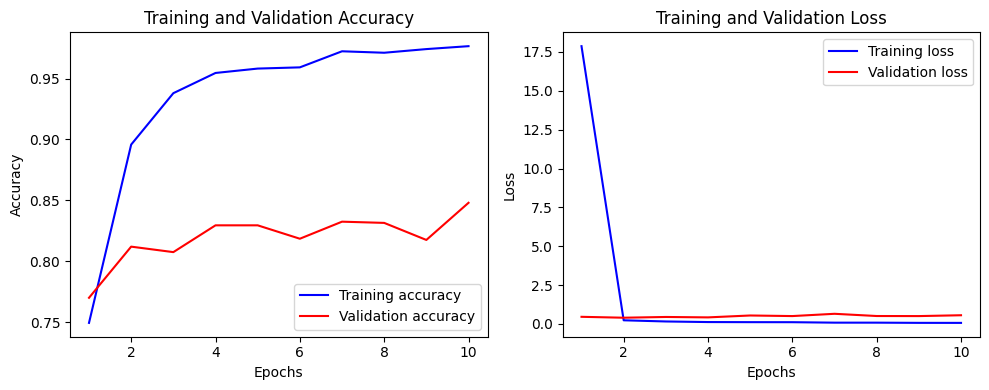

In [ ]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Predict probabilities and binary classifications on the test set
y_pred_prob = model.predict(X_test_resized)  # Predicted probabilities
y_pred_binary = (y_pred_prob > 0.5).astype(int)  # Predicted binary classes






63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step


In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(Y_test_binary, y_pred_binary)
recall = recall_score(Y_test_binary, y_pred_binary)
f1 = f1_score(Y_test_binary, y_pred_binary)
auc = roc_auc_score(Y_test_binary, y_pred_prob)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Precision: 0.7817
Recall: 0.7560
F1 Score: 0.7686
AUC: 0.9173


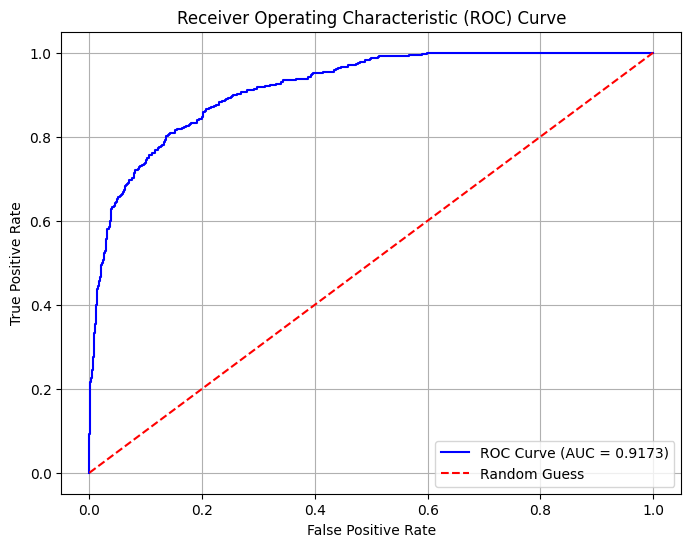

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_binary, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

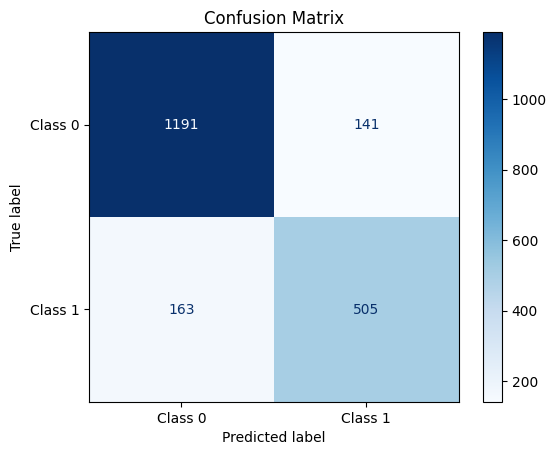

In [ ]:
# Generate and display the confusion matrix
cm = confusion_matrix(Y_test_binary, y_pred_binary)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


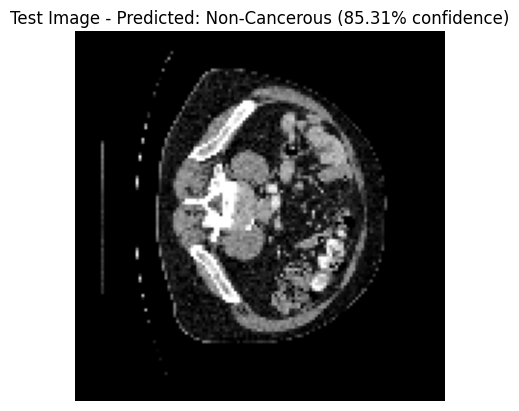

The predicted class is Non-Cancerous with a confidence of 85.31%


In [ ]:
# Single image prediction
test_image_path = '/content/drive/MyDrive/Pancreas/Images/X_test/1.png'
test_image = keras_image.load_img(test_image_path, target_size=(128, 128))  # Resize to the model's input size
test_image_array = keras_image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension

prediction = model.predict(test_image_array)
class_label = 'Cancerous' if prediction > 0.5 else 'Non-Cancerous'
confidence = prediction[0][0] if prediction > 0.5 else 1 - prediction[0][0]

plt.imshow(test_image)
plt.title(f'Test Image - Predicted: {class_label} ({confidence:.2%} confidence)')
plt.axis('off')
plt.show()

print(f'The predicted class is {class_label} with a confidence of {confidence:.2%}')